# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [177]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


### Merge the DataFrames

In [178]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12,10,Urban
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11,44,Urban
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11,21,Urban
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12,4,Urban
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12,33,Urban


## Deliverable 1: Get a Summary DataFrame 

In [179]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [180]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [181]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"])["fare"].sum()
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [182]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = (total_fares / total_ride_count)
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [183]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = (total_fares / total_drivers)
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [184]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd. DataFrame ({ "Total Rides" : total_ride_count, "Total Drivers" : total_drivers, "Total Fares" : total_fares, "Average Fare per Ride" : average_fare_ride, "Average Fare per Driver" : average_fare_driver })
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [185]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [186]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)                    
pyber_summary_df                                                      
                                                                                                                      

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [187]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [188]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_of_fares_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_of_fares_date_df

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [189]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_of_fares_date_df = sum_of_fares_date_df.reset_index()
sum_of_fares_date_df


,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [190]:
 # Get the datatypes for the DataFrame columns.
sum_of_fares_date_df.dtypes

type     object
date     object
fare    float64
dtype: object

In [191]:
#  Change the 'date' column to a datetime object.
sum_of_fares_date_df['date']= pd.to_datetime(sum_of_fares_date_df['date'])

In [192]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
date_fares_pivot = sum_of_fares_date_df.pivot (index = "date",columns = "type",values = "fare")
date_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:00,NaN,NaN,18.45
2019-05-08 07:29:00,NaN,NaN,18.55


In [226]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

jan_to_apr_df = date_fares_pivot.loc['01-01-2019':'04-28-2019']
jan_to_apr_df



type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [227]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

jan_to_apr_df.index= pd.to_datetime(jan_to_apr_df.index)
jan_to_apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:00,NaN,NaN,11.46
2019-04-28 16:29:00,NaN,NaN,36.42
2019-04-28 17:26:00,NaN,NaN,31.43


In [224]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_to_apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [228]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_df = jan_to_apr_df.resample('W').sum()
weekly_df


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<Figure size 640x480 with 0 Axes>

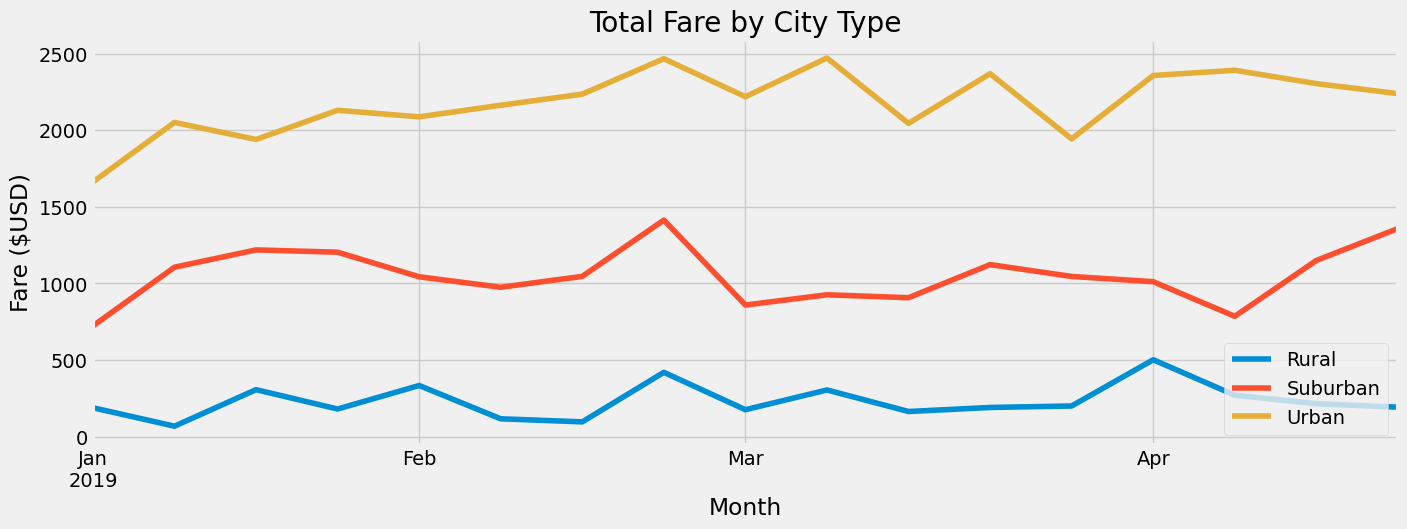

In [232]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig = plt.figure()
ax = weekly_df.plot(figsize = (15,5))

plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("Month")


lgnd = ax.legend(loc='lower right')

plt.savefig("Resources/analysis/PyBer_fare_summary.png")





